# Proyek Analisis Data: [Bike Sharing Dataset(https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)]
- **Nama:** Althaf Yudhistira
- **Email:** althafbanfsaj@gmail.com
- **ID Dicoding:** althafby

## Menentukan Pertanyaan Bisnis

1. Bagaimana Perkembangan penyewa sepeda ditiap musimnya?
2. Bagaimana perkembangan bulanan sewa sepda tiap tahunnya?
3. Berapa jumlah penyewa sepeda yang terdaftar sebagai member dan non-member?
4. Apakah ada hubungan antara penyewa sepeda dengan suhu, kelembapan, dan kecepatan angin?
5. Bagaimana behavior penyewa disetiap golongannya terhadap hari yang digunakan?

## Import Semua Packages/Library yang Digunakan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [32]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [34]:
day_df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

**Insight:**
- day_df berisi data harian penyewa sepeda kolom berisi 15 kolom
- hour_df berisi data tiap jam penyewa sepeda kolom berisi 15 kolom

### Assessing Data

In [35]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [37]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [38]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [39]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [40]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [41]:
print("Jumlah duplikasi day_df: ",day_df.duplicated().sum())
print("Jumlah duplikasi hour_df: ",hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


**Insight:**
- day_df memiliki data yang cukup bersih dengan 0 missing value dan 0 duplicate record
- hour_df memiliki data yang cukup bersih dengan 0 missing value dan 0 duplicate record

### Cleaning Data

In [42]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [43]:
day_df["season"] = day_df.season.apply(lambda x: "Spring" if x==1 else ("Summer" if x==2 else("Fall" if x==3 else "Winter")))
day_df["workingday"] = day_df.workingday.apply(lambda x: "Workingday" if x==1 else "Non-Workingday" )
day_df["day"] = day_df.weekday.apply(lambda x: "Sunday" if x==0 else ("Monday" if x==1 else("Tuesday" if x==2 else("Wednesday" if x==3 else("Thrusday" if x==4 else("Friday" if x==5 else "Saturday"))))))
day_df["yr"] = day_df.yr.apply(lambda x: "2011" if x==0 else "2012")
day_df['mnth'] = day_df['mnth'].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
    })
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=month_order, ordered=True)


In [44]:
hour_df["season"] = hour_df.season.apply(lambda x: "Spring" if x==1 else ("Summer" if x==2 else("Fall" if x==3 else "Winter")))
hour_df["workingday"] = hour_df.workingday.apply(lambda x: "Workingday" if x==1 else "Non-Workingday" )
hour_df["day"] = hour_df.weekday.apply(lambda x: "Sunday" if x==0 else ("Monday" if x==1 else("Tuesday" if x==2 else("Wednesday" if x==3 else("Thrusday" if x==4 else("Friday" if x==5 else "Saturday"))))))
hour_df["yr"] = hour_df.yr.apply(lambda x: "2011" if x==0 else "2012")

In [45]:
day_df.drop(['instant'], axis = 1, inplace= True)
hour_df.drop(['instant'], axis = 1, inplace= True)

In [46]:
day_df['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [47]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    object        
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    object        
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
 15  day         731 non-null    object        
dtypes: category(1), datetime64

In [48]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   yr          17379 non-null  object        
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  object        
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
 16  day         17379 non-

**Insight:**

**Karena kedua data memiliki kolom yang mirip sehingga pembersihan data akan meliputi :**
- merubah tipe data kolom 'dteday' menjadi datetime64
- memperjelas data yang berkaitan dengan pertanyaan bisnis yang masih menggunakan angka untuk melakukan proses klasifikasi dengan kelas sesungguhnya
- menghapus kolom 'instant' di kedua dataframe

## Exploratory Data Analysis (EDA)

### Explore ...

Melakukan pengelompokan pengguna sepeda berdasarkan

*   Musim
*   Tahun
*   Suhu, Kelembapan, Kecepatan Angin
*   Jenis Penyewa
*   Workingdays

Melakukan Pengecekean korelasi antara suhu dengan jumlah Pengguna








*Pengelompokan Berdasar Musim*




In [49]:
day_df.groupby(by="season").agg({
    "cnt": ["mean","max","min","sum"],
})

cnt                     
               mean   max   min      sum
season                                  
Fall    5644.303191  8714  1115  1061129
Spring  2604.132597  7836   431   471348
Summer  4992.331522  8362   795   918589
Winter  4728.162921  8555    22   841613

*Pengelompokan Berdasar Tahun*




In [50]:
day_df.groupby(['mnth', 'yr']).agg({
    "cnt": ["mean","max","min","sum"],
})

C:\Users\Emesi\AppData\Local\Temp\ipykernel_10848\3573278602.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(['mnth', 'yr']).agg({


cnt                    
                  mean   max   min     sum
mnth yr                                   
Jan  2011  1231.903226  1985   431   38189
     2012  3120.774194  4521  1301   96744
Feb  2011  1721.964286  2927  1005   48215
     2012  3556.448276  5062  1529  103137
Mar  2011  2065.967742  3239   605   64045
     2012  5318.548387  8362  3194  164875
Apr  2011  3162.333333  5312   795   94870
     2012  5807.466667  7460  1027  174224
May  2011  4381.322581  5805  2633  135821
     2012  6318.225806  8294  2843  195865
Jun  2011  4783.733333  5515  3767  143512
     2012  6761.000000  8120  4127  202830
Jul  2011  4559.387097  6043  3285  141341
     2012  6567.967742  8173  4459  203607
Aug  2011  4409.387097  5895  1115  136691
     2012  6919.451613  7865  4549  214503
Sep  2011  4247.266667  5423  1842  127418
     2012  7285.766667  8714  4073  218573
Oct  2011  3984.225806  5511   627  123511
     2012  6414.225806  8156    22  198841
Nov  2011  3405.566667  4486  1495  102167
     2012  5088.800000  6852  2277  152664
Dec  2011  2816.870968  3940   705   87323
     2012  3990.741935  6606   441  123713

*Pengelompokan Berdasar Jenis Suhu, Kelembapan, Kecepatan Angin*




In [51]:
day_df.groupby(by="season").agg({
    "temp": ["mean","max","min","median"],
    "atemp": ["mean","max","min","median"],
    "hum": ["mean","max","min","median"],
    "windspeed": ["mean","max","min","median"],
})

temp                                   atemp                      \
            mean       max       min    median      mean       max       min   
season                                                                         
Fall    0.706309  0.861667  0.469167  0.714583  0.655898  0.840896  0.242400   
Spring  0.297748  0.572500  0.059130  0.285833  0.296914  0.548617  0.079070   
Summer  0.544405  0.808333  0.253043  0.562083  0.520307  0.757579  0.250339   
Winter  0.422906  0.657500  0.220833  0.409166  0.415539  0.607975  0.227913   

                       hum                               windspeed            \
          median      mean       max       min    median      mean       max   
season                                                                         
Fall    0.656575  0.633482  0.939565  0.360000  0.635000  0.172095  0.375617   
Spring  0.282821  0.582903  0.948261  0.000000  0.544167  0.214537  0.507463   
Summer  0.538212  0.626948  0.922500  0.254167  0.644375  0.203507  0.388067   
Winter  0.409394  0.668719  0.972500  0.333478  0.661042  0.171995  0.422275   

                            
             min    median  
season                      
Fall    0.064071  0.165115  
Spring  0.045408  0.202750  
Summer  0.065929  0.194031  
Winter  0.022392  0.166986

*Pengelompokan Berdasar Jenis Pelanggan*




In [52]:
day_df.agg({
    "casual": ["mean","max","min"],
    "registered": ["mean","max","min"]
})

,casual,registered
mean,848.176471,3656.172367
max,3410.000000,6946.000000
min,2.000000,20.000000


*Pengelompokan Berdasar Jenis Hari pada saat penyewaan*




In [53]:
day_df.groupby(by="workingday").agg({
    "cnt": ["mean","max","min"],
    "casual": ["mean","max","min"],
    "registered": ["mean","max","min"]
})

cnt                  casual             registered  \
                       mean   max  min         mean   max min         mean   
workingday                                                                   
Non-Workingday  4330.168831  8714  605  1371.134199  3410  54  2959.034632   
Workingday      4584.820000  8362   22   606.570000  2469   2  3978.250000   

                           
                 max  min  
workingday                 
Non-Workingday  5966  451  
Workingday      6946   20

In [62]:
corr_day_df=day_df[['temp','atemp','hum','windspeed','cnt']]
corr_day_df.corr()


,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


**Insight:**
- Musim paling banyak penyewa sepeda adalah musim gugur, dan musim paling sedikit penyewa adalah musim semi. serta puncak penyewa juga ditemukan di musim gugur sedangkan puncak terendah berada pada musim dingin.
- Tahun 2012 adalah tahun dengan penyewa yang relatif tinggi dibandingkan dengan tahun 2011
- Suhu tertinggi ditemukan di musim gugur sedangkan titik terendah berada di musim semi. sedangkan kelembapan tertinggi ada pada musim dingin dan terendahnya pada musim semi.
- Jenis pelanggan ada 2 yaitu Registered dan Casual
- Penyewa cenderung lebih suka menyewa pada hari kerja
- penyewa cenderung melakukan penyewaan sepeda bergantung pada suhu dengan kecocokan sebesar 63% . yang mana penyewa tidak terlalu memperdulikan kelembapan maupun kecepatan angin ketika menyewa sepeda dengan kecocokan sebesar -10% dan -23%.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Perkembangan penyewa sepeda ditiap musimnya?


C:\Users\Emesi\AppData\Local\Temp\ipykernel_10848\3345766335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=season_data['cnt'], x=season_data['season'], palette=sns.color_palette("pastel"))
C:\Users\Emesi\AppData\Local\Temp\ipykernel_10848\3345766335.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(y=season_data['cnt'], x=season_data['season'], palette=sns.color_palette("pastel"))


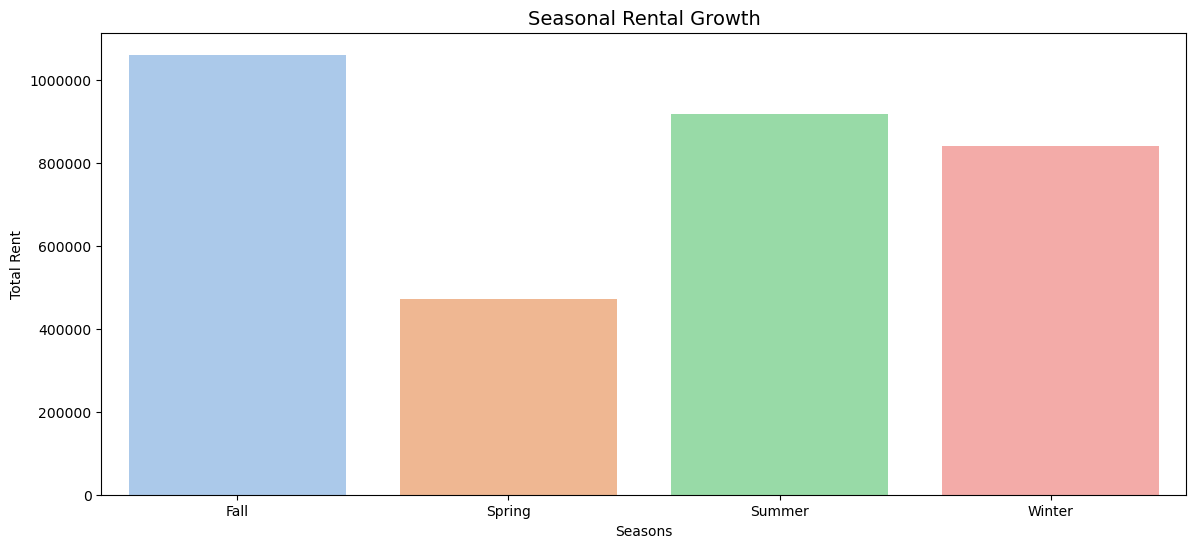

In [54]:
season_data = day_df.groupby(['season'])['cnt'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(y=season_data['cnt'], x=season_data['season'], palette=sns.color_palette("pastel"))
plt.title("Seasonal Rental Growth", fontsize=14)
plt.xlabel("Seasons")
plt.ylabel("Total Rent")
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

### Pertanyaan 2:Bagaimana perkembangan bulanan sewa sepda tiap tahunnya?


C:\Users\Emesi\AppData\Local\Temp\ipykernel_10848\2465852995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()


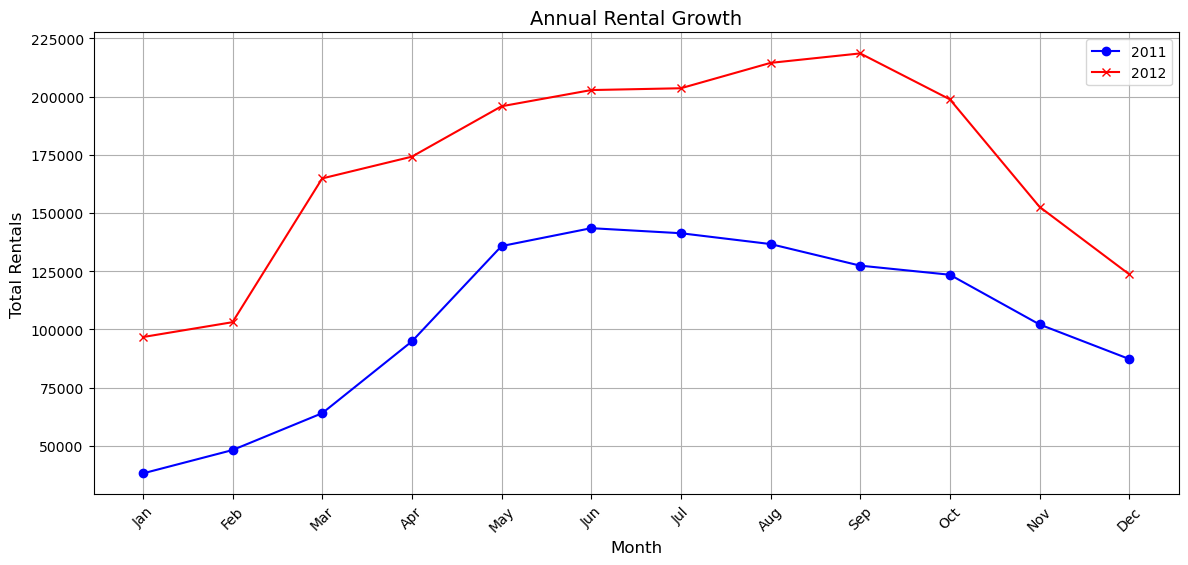

In [59]:
monthly_data = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

data_2011 = monthly_data[monthly_data['yr'] == '2011']
data_2012 = monthly_data[monthly_data['yr'] == '2012']
# Setting up the figure size for the plot
plt.figure(figsize=(14, 6))

# Plotting data for 2011
plt.plot(data_2011['mnth'], data_2011['cnt'], marker='o',  color='b', label='2011')

# Plotting data for 2012
plt.plot(data_2012['mnth'], data_2012['cnt'],marker='x', color='r', label='2012')

# Adding titles and labels
plt.title('Annual Rental Growth', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(data_2011['mnth'], rotation=45)  # Rotating month labels for better readability
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()



### Pertanyaan 3: Berapa jumlah penyewa sepeda yang terdaftar sebagai member dan non-member?n?


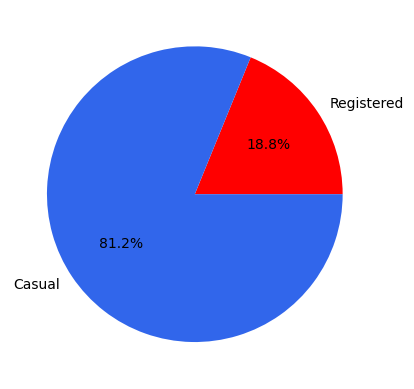

In [57]:
customer_type = day_df.agg({'casual': 'sum', 'registered': 'sum'})
labels = ['Registered','Casual']
plt.pie(customer_type,labels=labels, autopct='%1.1f%%', colors =['red','#3166eb'])
plt.show()


**Insight:**

1.   Musim dengan penghasil revenue terbesar jatuh pada musim gugur, diikuti dengan musim panas, musim dingin, dan semi. penyewa cenderung menyukai musim gugur dikarenakan pada musim tersebut relatif memiliki suhu yang cocok untuk digunakan bersepeda
2.   Penyewa dari tahun ketahun mengalami kenaikan yang mana kenaikan tersebut dimulai pada bulan febuari hingga juni yang merupakan puncak dari kenaikan, dan akan turun perlahan hingga oktober, dan pada november serta desember mengalami penurunan drastis untuk 2011. sedangkan 2012 memiliki pola yang hampir mirip namun puncak penyewa berada dibulan september dan penurunan pengguna terjadi secara drastis pada bulan oktober dan bulan selanjutnya.
3. Dengan Menggunakan Pengelompokan Groupby kita dapat membuat pivot tabel berdasarkan jenis penyewa dari cnt dapat dikelompokkan berdasarkan jumlah registered dan casual. yang mana kedua kelompok tersebut memiliki arti registered untuk pengguna berlangganan dan casual untuk yang tidak berlangganan. penyewa didominasi oleh peggunan yang tidak berlangganan.dapat berarti pengguna sepeda bisa berasal dari turis ataupun calon pengguna


## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Apakah ada hubungan antara penyewa sepeda dengan suhu, kelembapan, dan kecepatan angin?


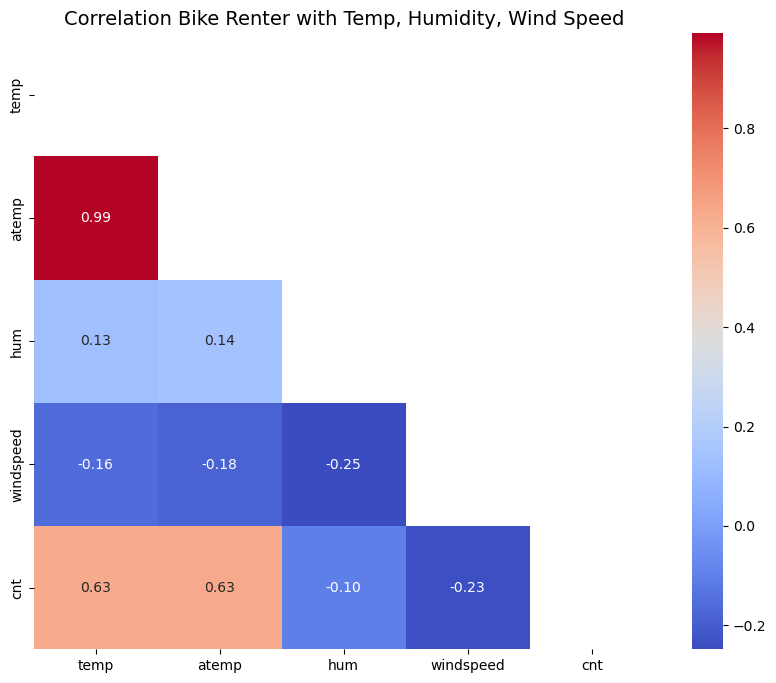

In [56]:
cor_data=day_df[['temp','atemp','hum','windspeed','cnt']]
fig, ax = plt.subplots(figsize=(10,8))
correlation_matrix = cor_data.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt=".2f", mask =np.triu(np.ones_like(correlation_matrix, dtype=bool)))
plt.title("Correlation Bike Renter with Temp, Humidity, Wind Speed", fontsize= 14)
plt.show()

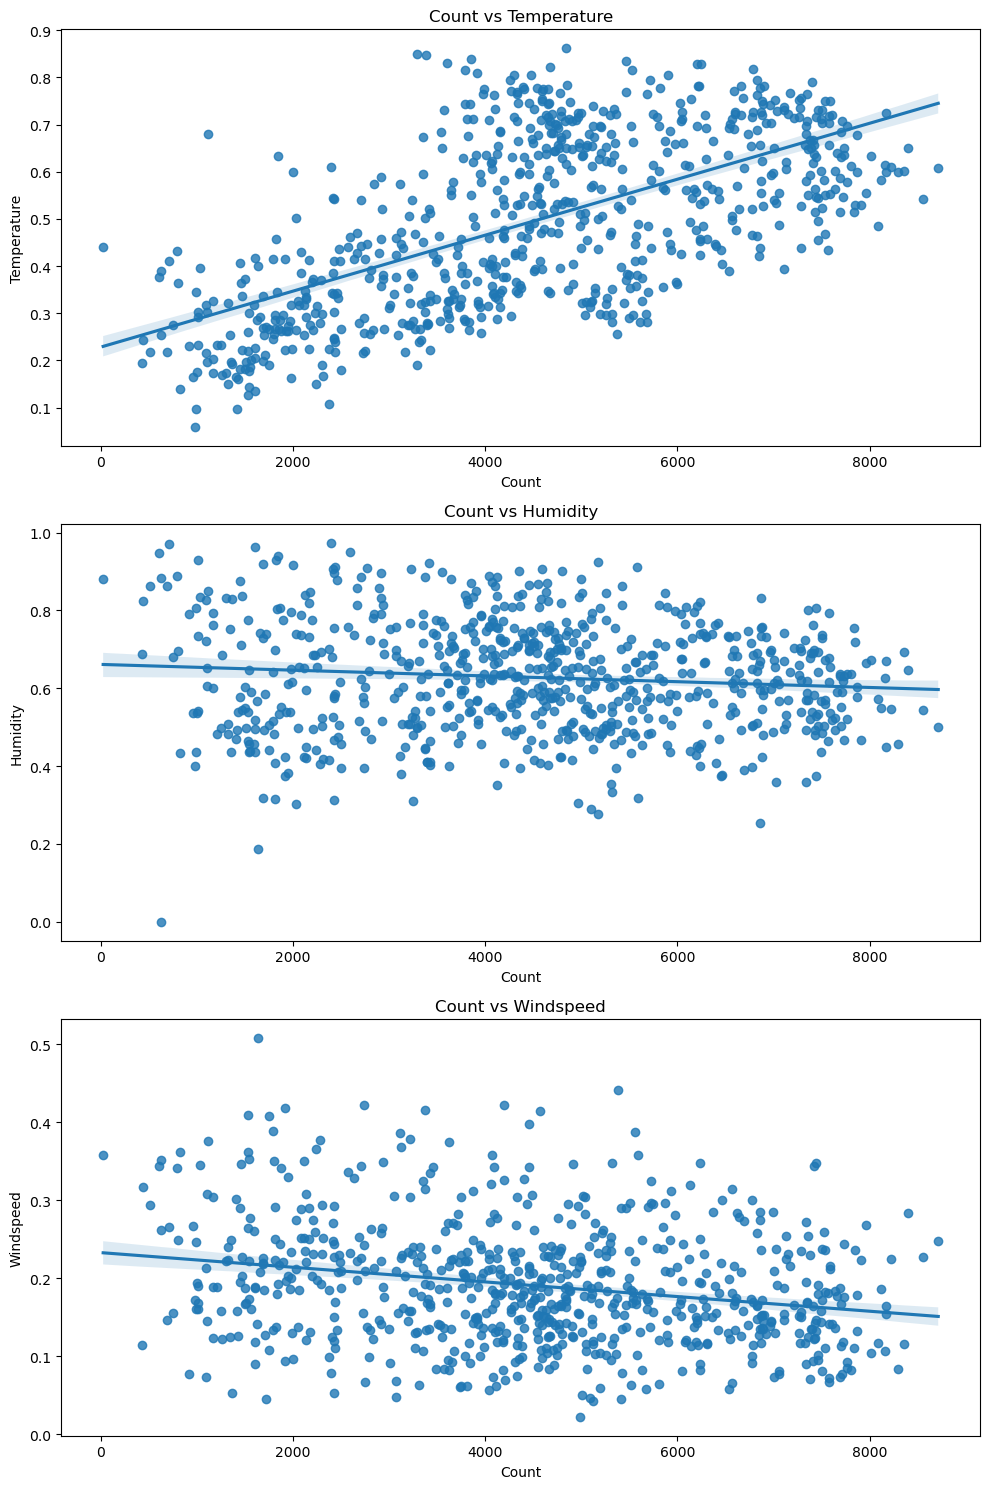

In [81]:

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.regplot(x=day_df['cnt'], y=day_df['temp'], ax=axs[0])
axs[0].set_title('Count vs Temperature')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Temperature')
axs[0].yaxis.get_major_formatter().set_scientific(False)  


sns.regplot(x=day_df['cnt'], y=day_df['hum'], ax=axs[1])
axs[1].set_title('Count vs Humidity')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Humidity')
axs[1].yaxis.get_major_formatter().set_scientific(False) 

sns.regplot(x=day_df['cnt'], y=day_df['windspeed'], ax=axs[2])
axs[2].set_title('Count vs Windspeed')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Windspeed')
axs[2].yaxis.get_major_formatter().set_scientific(False)  
plt.tight_layout()

plt.show()

### Pertanyaan 5: Bagaimana behavior penyewa disetiap golongannya terhadap hari yang digunakan?


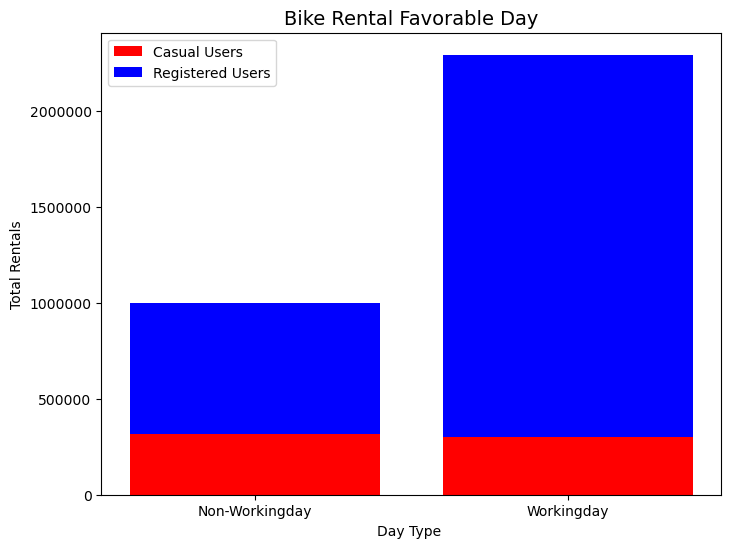

In [58]:
day_type_data = day_df.groupby(['workingday'])[['casual', 'registered']].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(day_type_data['workingday'], day_type_data['casual'], label='Casual Users', color='red')
ax.bar(day_type_data['workingday'], day_type_data['registered'], bottom=day_type_data['casual'], label='Registered Users', color='blue')

ax.set_title('Bike Rental Favorable Day', fontsize=14)
ax.set_xlabel('Day Type ', fontsize=10)
ax.set_ylabel('Total Rentals', fontsize=10)

ax.legend()
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

## Conclusion

4. Kolerasi dapat digambarkan dengan heatmap dan terlihat jelas bahwa jumlah pengguna memiliki kolerasi yang cukup dekat dengan temp dan atemp, juga jika dikelompokkan berdasar kedekatan kolerasinya akan menghasilkan sebaran data seperti visualisasi diatas yang mana visualisasi tersebut membuktikan bahwa kedekatan antara temp dan atemp terhadap jumlah pengguna cenderung lebih dekat dibanding variabel lain dengan mempengaruhi satu nilai satu sama lain seperti jika temperatur naik jumlah penyewa juga ikut naik. hubungan tersebut tidak terdapat pada variabel lain jika dihubungkan dengan jumlah pengguna.
5.  Dengan Menggunakan Pengelompokan Groupby kita dapat membuat pivot tabel berdasarkan jenis penyewa dengan kedua jenis tersebut juga dapat dikelompokkan lagi berdasarkan kapan mereka menyewa. dan pada grafik tersebut penyewa dengan penyumbang revenue terbesar berasal dari pengguna yang menyewa pada hari kerja.